<a href="https://colab.research.google.com/github/Justabhi96/TF2.0/blob/master/3_Linear_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q tensorflow==2.0.0-beta1
import tensorflow as tf

In [0]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
type(data)

sklearn.utils.Bunch

In [0]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [0]:
data.data.shape, data.target.shape

((569, 30), (569,))

In [0]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [0]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size = 0.33)
N, D = X_train.shape

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.transform(X_test)

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = (D,)),
    tf.keras.layers.Dense(1, activation = "sigmoid")                                 
])

# Alternatively we can do 
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(1, input_shape = (D,), activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

r = model.fit(scaled_x_train, y_train, validation_data= (scaled_x_test, y_test), epochs = 100)

Train on 381 samples, validate on 188 samples
Epoch 1/100
381/381 [==============================] - 0s 489us/sample - loss: 0.4674 - accuracy: 0.8189 - val_loss: 0.5240 - val_accuracy: 0.7979
Epoch 2/100
381/381 [==============================] - 0s 62us/sample - loss: 0.4214 - accuracy: 0.8504 - val_loss: 0.4861 - val_accuracy: 0.8351
Epoch 3/100
381/381 [==============================] - 0s 67us/sample - loss: 0.3842 - accuracy: 0.8845 - val_loss: 0.4546 - val_accuracy: 0.8564
Epoch 4/100
381/381 [==============================] - 0s 62us/sample - loss: 0.3538 - accuracy: 0.9055 - val_loss: 0.4286 - val_accuracy: 0.8723
Epoch 5/100
381/381 [==============================] - 0s 62us/sample - loss: 0.3289 - accuracy: 0.9160 - val_loss: 0.4069 - val_accuracy: 0.8883
Epoch 6/100
381/381 [==============================] - 0s 69us/sample - loss: 0.3079 - accuracy: 0.9160 - val_loss: 0.3877 - val_accuracy: 0.8830
Epoch 7/100
381/381 [==============================] - 0s 68us/sample - loss:

In [0]:
print("Train score: ", model.evaluate(scaled_x_train, y_train))
print("Test score: ", model.evaluate(scaled_x_test, y_test))

381/381 [==============================] - 0s 86us/sample - loss: 0.0829 - accuracy: 0.9843
Train score:  [0.08293776444875663, 0.984252]
188/188 [==============================] - 0s 52us/sample - loss: 0.0922 - accuracy: 0.9787
Test score:  [0.09218344869131738, 0.9787234]


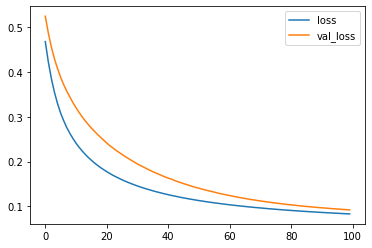

In [0]:
import matplotlib.pyplot as plt

plt.plot(r.history["loss"], label = "loss")
plt.plot(r.history["val_loss"], label = "val_loss")
plt.legend()

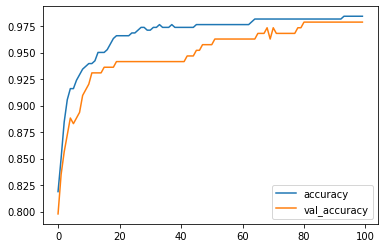

In [0]:
plt.plot(r.history["accuracy"], label = "accuracy")
plt.plot(r.history["val_accuracy"], label = "val_accuracy")
plt.legend()

# Just a comparision with random forest classifier

In [0]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
from sklearn.metrics import accuracy_score, classification_report
pred = rf.predict(X_test)

accuracy_score(y_test, pred)

0.9308510638297872

In [0]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91        66
           1       0.97      0.93      0.95       122

    accuracy                           0.93       188
   macro avg       0.92      0.93      0.93       188
weighted avg       0.93      0.93      0.93       188

